In [1]:
import pandas as pd # pandas is used to load and manipulate data and for One-Hot Encoding
import numpy as np # data manipulation
import os
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
import matplotlib.colors as colors
from sklearn.utils import resample # downsample the dataset
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn import preprocessing # scale and center data
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import plot_partial_dependence
from sklearn.neural_network import MLPRegressor
import datetime
from pandas.tseries.offsets import *


In [333]:
data_folder = '/Users/jeffreychen/UCLA_HWDATA/QAM_DATA/final_data/'
#ret75 = pd.read_csv(data_folder + '75_Monthly Return.csv')

ret50 = pd.read_csv(data_folder + '50_neural_net_full.csv')
ret50

,Unnamed: 0,permno,DATE,monthly_ret,mvel1,beta,betasq,chmom,dolvol,idiovol,...,ill,maxret,retvol,std_dolvol,std_turn,zerotrade,sic2,month,year,TICKER
0,0.0,12490,1971/1/29,0.024390,3.403772e+06,0.803744,0.646005,0.590998,12.965288,0.020154,...,5.840000e-10,0.019481,0.008485,0.313654,0.110307,2.850000e-07,73.0,1,1971,IBM
1,0.0,46711,1971/1/29,0.400000,5.715000e+03,0.836741,0.700136,0.100862,7.024093,0.056848,...,2.250000e-06,0.025641,0.026531,0.854184,2.057111,4.540000e-08,42.0,1,1971,TSM
2,0.0,12490,1971/2/26,0.037788,3.578008e+06,0.794590,0.631373,0.533709,13.163648,0.020440,...,8.320000e-10,0.025197,0.010993,0.266698,0.081812,3.590000e-07,73.0,2,1971,IBM
3,NaN,46711,1971/2/26,0.285714,8.001000e+03,0.839637,0.704991,0.833386,7.826044,0.056339,...,6.040000e-06,0.096154,0.037649,1.001973,1.896845,7.020000e-08,42.0,2,1971,TSM
4,NaN,12490,1971/3/31,0.062407,3.664222e+06,0.753383,0.567586,0.484282,13.195981,0.020724,...,8.800000e-10,0.022088,0.010564,0.221342,0.054026,4.700000e-07,73.0,3,1971,IBM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7277,NaN,90319,2016/12/30,0.021356,1.071768e+08,0.899436,0.808984,0.054448,18.580861,0.031339,...,6.560000e-12,0.029128,0.015422,0.458631,3.774304,1.280000e-08,73.0,12,2016,GOOGL
7278,NaN,91893,2016/12/30,-0.135343,3.000031e+04,0.831672,0.691679,-0.164510,9.723564,0.096353,...,5.990000e-07,0.060870,0.041781,0.913348,2.241420,3.910000e-08,73.0,12,2016,FNJN
7279,NaN,92257,2016/12/30,-0.029702,9.052465e+06,0.685033,0.469270,0.353670,17.364384,0.036946,...,7.230000e-11,0.032050,0.011528,0.484570,4.852816,7.060000e-09,73.0,12,2016,VMW
7280,NaN,93132,2016/12/30,0.000664,5.208474e+06,1.299777,1.689419,-0.069890,16.991111,0.037352,...,1.880000e-10,0.018459,0.013527,0.574037,8.767311,7.270000e-09,35.0,12,2016,FTNT


In [334]:
ret50.drop('Unnamed: 0', axis=1, inplace=True)
stk_char_cols = ret50.columns[3:97]
ret50['DATE'] = pd.to_datetime(ret50['DATE'], format='%Y/%m/%d', errors='ignore')
ret50['Year'] = ret50['DATE'].dt.year
ret50['Month'] = ret50['DATE'].dt.month
ret50

,permno,DATE,monthly_ret,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,...,retvol,std_dolvol,std_turn,zerotrade,sic2,month,year,TICKER,Year,Month
0,12490,1971-01-29,0.024390,3.403772e+06,0.803744,0.646005,0.590998,12.965288,0.020154,-0.299786,...,0.008485,0.313654,0.110307,2.850000e-07,73.0,1,1971,IBM,1971,1
1,46711,1971-01-29,0.400000,5.715000e+03,0.836741,0.700136,0.100862,7.024093,0.056848,-0.071420,...,0.026531,0.854184,2.057111,4.540000e-08,42.0,1,1971,TSM,1971,1
2,12490,1971-02-26,0.037788,3.578008e+06,0.794590,0.631373,0.533709,13.163648,0.020440,-0.201744,...,0.010993,0.266698,0.081812,3.590000e-07,73.0,2,1971,IBM,1971,2
3,46711,1971-02-26,0.285714,8.001000e+03,0.839637,0.704991,0.833386,7.826044,0.056339,0.082094,...,0.037649,1.001973,1.896845,7.020000e-08,42.0,2,1971,TSM,1971,2
4,12490,1971-03-31,0.062407,3.664222e+06,0.753383,0.567586,0.484282,13.195981,0.020724,-0.157373,...,0.010564,0.221342,0.054026,4.700000e-07,73.0,3,1971,IBM,1971,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7277,90319,2016-12-30,0.021356,1.071768e+08,0.899436,0.808984,0.054448,18.580861,0.031339,0.016401,...,0.015422,0.458631,3.774304,1.280000e-08,73.0,12,2016,GOOGL,2016,12
7278,91893,2016-12-30,-0.135343,3.000031e+04,0.831672,0.691679,-0.164510,9.723564,0.096353,0.016401,...,0.041781,0.913348,2.241420,3.910000e-08,73.0,12,2016,FNJN,2016,12
7279,92257,2016-12-30,-0.029702,9.052465e+06,0.685033,0.469270,0.353670,17.364384,0.036946,0.016401,...,0.011528,0.484570,4.852816,7.060000e-09,73.0,12,2016,VMW,2016,12
7280,93132,2016-12-30,0.000664,5.208474e+06,1.299777,1.689419,-0.069890,16.991111,0.037352,0.053773,...,0.013527,0.574037,8.767311,7.270000e-09,35.0,12,2016,FTNT,2016,12


In [335]:
stk_char_cols

Index(['mvel1', 'beta', 'betasq', 'chmom', 'dolvol', 'idiovol', 'indmom',
       'mom1m', 'mom6m', 'mom12m', 'mom36m', 'pricedelay', 'turn', 'absacc',
       'acc', 'age', 'agr', 'bm', 'bm_ia', 'cashdebt', 'cashpr', 'cfp',
       'cfp_ia', 'chatoia', 'chcsho', 'chempia', 'chinv', 'chpmia', 'convind',
       'currat', 'depr', 'divi', 'divo', 'dy', 'egr', 'ep', 'gma', 'grcapx',
       'grltnoa', 'herf', 'hire', 'invest', 'lev', 'lgr', 'mve_ia', 'operprof',
       'orgcap', 'pchcapx_ia', 'pchcurrat', 'pchdepr', 'pchgm_pchsale',
       'pchquick', 'pchsale_pchinvt', 'pchsale_pchrect', 'pchsale_pchxsga',
       'pchsaleinv', 'pctacc', 'ps', 'quick', 'rd', 'rd_mve', 'rd_sale',
       'realestate', 'roic', 'salecash', 'saleinv', 'salerec', 'secured',
       'securedind', 'sgr', 'sin', 'sp', 'tang', 'tb', 'aeavol', 'cash',
       'chtx', 'cinvest', 'ear', 'nincr', 'roaq', 'roavol', 'roeq', 'rsup',
       'stdacc', 'stdcf', 'ms', 'baspread', 'ill', 'maxret', 'retvol',
       'std_dolvol', 'std_

In [336]:
macro_data=pd.read_csv(data_folder + 'macro/Macro_Result.csv')
macro_data.drop('Unnamed: 0', axis=1, inplace=True)
macro_data['date'] = pd.to_datetime(macro_data['yyyymm'].astype(str), format='%Y%m', errors='ignore') + MonthEnd(1)
macro_data['Year'] = macro_data['date'].dt.year
macro_data['Month'] = macro_data['date'].dt.month
macro_data.rename(columns={
    'dp':'DP',
    'ep':'EP',
    'tms':'TMS',
    'dfy':'DFY',
    'b/m':'B/M',
    'ntis':'NTIS',
    'tbl':'TBL',
    'svar':'SVAR',
}, inplace=True)
macro_params = [ 'DP', 'EP', 'TMS', 'DFY', 'B/M', 'NTIS', 'TBL', 'SVAR']
macro_data[macro_params] = macro_data[macro_params].shift(-1)
macro_data

,yyyymm,DP,EP,TMS,DFY,B/M,NTIS,TBL,SVAR,date,Year,Month
0,187101,-2.851151,-2.420368,NaN,NaN,NaN,NaN,NaN,NaN,1871-01-31,1871,1
1,187102,-2.875302,-2.444519,NaN,NaN,NaN,NaN,NaN,NaN,1871-02-28,1871,2
2,187103,-2.903111,-2.472328,NaN,NaN,NaN,NaN,NaN,NaN,1871-03-31,1871,3
3,187104,-2.928112,-2.497329,NaN,NaN,NaN,NaN,NaN,NaN,1871-04-30,1871,4
4,187105,-2.919848,-2.489065,NaN,NaN,NaN,NaN,NaN,NaN,1871-05-31,1871,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1795,202008,-4.045576,-3.533379,0.0057,0.0105,0.241482,-0.005698,0.0011,0.004907,2020-08-31,2020,8
1796,202009,-4.020767,-3.519301,0.0069,0.0109,0.253146,-0.001895,0.0010,0.003661,2020-09-30,2020,9
1797,202010,-4.126172,-3.635623,0.0078,0.0100,0.226352,-0.005262,0.0009,0.002492,2020-10-31,2020,10
1798,202011,-4.165889,-3.686452,0.0084,0.0090,0.219195,-0.000094,0.0009,0.000678,2020-11-30,2020,11


In [337]:
all_data = ret50.merge(macro_data, on=['Year','Month'], how='left').copy()

In [338]:
all_data['Const'] = 1
all_data.drop(['yyyymm','Year','Month','date'], axis=1, inplace=True)

In [339]:
macro_params.append('Const')
macro_params

['DP', 'EP', 'TMS', 'DFY', 'B/M', 'NTIS', 'TBL', 'SVAR', 'Const']

In [340]:
cit_cols = stk_char_cols
xt_cols = macro_params

add dummies

In [341]:
all_data['sic2']=all_data['sic2'].astype(object)
#Removed one level as we have Const
industry = pd.get_dummies(all_data.sic2).iloc[:,:-1]
# all_data = all_data.join(pd.get_dummies(all_data.sic2).iloc[:,:-1])
#all_data.to_csv(data_folder + 'macro_stock_dummies.csv')
all_data.drop(columns=['sic2'], inplace=True)
industry.columns = [str(col) + '_i' for col in industry.columns]
industry


,13.0_i,28.0_i,34.0_i,35.0_i,36.0_i,37.0_i,42.0_i,59.0_i,60.0_i,73.0_i,78.0_i,79.0_i
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7277,0,0,0,0,0,0,0,0,0,1,0,0
7278,0,0,0,0,0,0,0,0,0,1,0,0
7279,0,0,0,0,0,0,0,0,0,1,0,0
7280,0,0,0,1,0,0,0,0,0,0,0,0


In [342]:
stocks = all_data.join(industry).copy()
stocks = stocks.sort_values(['permno','DATE']).reset_index(drop=True)
stock_size = stocks.groupby('DATE')['permno'].count().to_frame().reset_index().rename(columns={'permno':'permno_count'})

stocks = stocks.merge(stock_size, on=['DATE'], how='left')
stocks.rename(columns={'permno_count':'size'},inplace=True)
stocks = stocks.loc[stocks['size'] > 10]
stocks = stocks.sort_values(['DATE'])
#del stock_size
#stocks.drop(['size'],axis=1,inplace=True)
stocks['Year'] = stocks['DATE'].dt.year
stocks['Month'] = stocks['DATE'].dt.month
stocks

,permno,DATE,monthly_ret,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,...,37.0_i,42.0_i,59.0_i,60.0_i,73.0_i,78.0_i,79.0_i,size,Year,Month
1757,14593,1986-05-30,0.223140,1.918183e+06,0.869701,0.756380,0.747690,15.465776,0.064282,0.097495,...,0,0,0,0,0,0,0,11,1986,5
3998,61241,1986-05-30,-0.061674,1.612296e+06,2.274254,5.172230,0.375339,14.490939,0.048809,0.097495,...,0,0,0,0,0,0,0,11,1986,5
2635,51772,1986-05-30,0.083624,1.406085e+06,1.034290,1.069756,0.275655,13.790090,0.030519,0.513616,...,0,0,0,1,0,0,0,11,1986,5
4420,65752,1986-05-30,0.466667,3.682500e+03,1.259525,1.586404,-0.367512,5.896467,0.079483,0.378413,...,0,0,0,0,0,0,0,11,1986,5
4856,70440,1986-05-30,0.000000,4.987500e+03,1.071784,1.148720,0.075000,7.528332,0.079082,0.168193,...,0,0,0,0,0,0,0,11,1986,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6932,90319,2016-12-30,0.021356,1.071768e+08,0.899436,0.808984,0.054448,18.580861,0.031339,0.016401,...,0,0,0,0,1,0,0,24,2016,12
7011,91893,2016-12-30,-0.135343,3.000031e+04,0.831672,0.691679,-0.164510,9.723564,0.096353,0.016401,...,0,0,0,0,1,0,0,24,2016,12
7121,92257,2016-12-30,-0.029702,9.052465e+06,0.685033,0.469270,0.353670,17.364384,0.036946,0.016401,...,0,0,0,0,1,0,0,24,2016,12
1556,12490,2016-12-30,0.023240,1.071768e+08,0.784147,0.614886,-0.050151,18.580861,0.022446,0.016401,...,0,0,0,0,1,0,0,24,2016,12


checking holdings

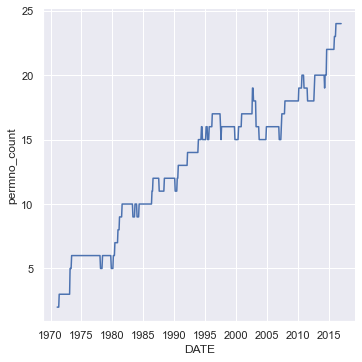

In [343]:
import seaborn as sns

sns.relplot(data=stock_size,x='DATE',y='permno_count', kind='line')

In [347]:
industry.columns

Index(['13.0_i', '28.0_i', '34.0_i', '35.0_i', '36.0_i', '37.0_i', '42.0_i',
       '59.0_i', '60.0_i', '73.0_i', '78.0_i', '79.0_i'],
      dtype='object')

In [377]:
NN2 = MLPRegressor(solver = 'lbfgs', alpha = 1, activation='tanh',
                      hidden_layer_sizes = (32,16), max_iter = 100000, random_state = 1)
def kro(row):
    Cit = row[cit_cols]
    Xt = row[xt_cols]
    zit = np.kron(Xt, Cit)
    return zit

result_df_nonscaled = pd.DataFrame()
for yr in range(1995, 2016):
    print(f'\n at year {yr}',end=',')
    t_stock = stocks.loc[stocks['Year'] == yr].copy().reset_index(drop=True)
    valid_comp = t_stock.loc[t_stock['Month'] == 12]['permno'].values #reset_index(drop=True)
    # print(f'valid_comp:{valid_comp}')
    ###############
    #check company exist next year or not
    t_1_stock = stocks.loc[stocks['Year'] == (yr + 1)].copy().reset_index(drop=True)
    is_comp_valid = t_1_stock.permno.isin(valid_comp)
    #remove company doesn't exist previous year
    t_1_stock = t_1_stock[is_comp_valid]
    
    ###############
    # train model at year t
    zit = pd.DataFrame(t_stock.apply(kro, axis=1).to_list())
    zit = zit.fillna(0)   
    indus_train = t_stock[industry.columns].reset_index(drop=True).copy()
    x_train = zit.join(indus_train)
    #print(x_train)
    #x_train.replace([np.inf, -np.inf], 0, inplace=True)
    y_train = t_stock['monthly_ret']
    
    
    county_na = np.isnan(y_train).values.sum()
    if county_na > 0:
        county_inf = np.isinf(y_train).values.sum()

        print(
            f'y has na {county_na}',
            f'y has inf {county_inf}'
        )
        
        y_train = y_train.fillna(0)
    
    regr = NN2.fit(x_train, y_train)    
    #regr = NN2.fit(x_train_scaled, y_train)
    ###############
    # t + 1 predict
    # creat t+1 yearly df
    # t_1_df = pd.DataFrame()    
    #nasted stuff
    # Dec predict nxt yr Jan
    t_dec = t_stock[t_stock['Month'] == 12].copy()
    indus = t_dec[industry.columns].reset_index(drop=True).copy()
    zit_dec = pd.DataFrame(t_dec.apply(kro, axis=1).to_list())      
    zit_dec = zit_dec.fillna(0)
    x_test_dec = zit_dec.join(indus)
    pred_ret = regr.predict(x_test_dec)


    pred_jan = t_dec[['permno']].copy()
    pred_jan['pred_ret'] = pred_ret
    
    t_1_jan = t_1_stock[t_1_stock['Month'] == 1].copy()
    t_1_jan = t_1_jan[['permno','DATE','monthly_ret']]   
    # merge back to get true monthly ret
    t_1_df = pd.merge(pred_jan, t_1_jan, how='left', on='permno').reset_index(drop=True)

    
    for month in range(1, 12):
        print(f' m : {month}', end=',')
        t_stock_m = t_1_stock[t_1_stock['Month'] == month].copy()
        zit_m = pd.DataFrame(t_stock_m.apply(kro, axis=1).to_list())    
        zit_m = zit_m.fillna(0)
        indus_m = t_stock_m[industry.columns].reset_index(drop=True).copy()  
        #remove company doesn't exist previous year
        x_test_t_m = zit_m.join(indus_m)
        pred_ret_m = regr.predict(x_test_t_m)
        
        pred_m = t_stock_m[['permno']].copy()
        pred_m['pred_ret'] = pred_ret_m        
        
        #merge with true t+1 month return
        t_1_stock_m = t_1_stock[t_1_stock['Month'] == (month+1)].copy()
        t_1_stock_m = t_1_stock_m[['permno','DATE','monthly_ret']].copy()
        t_1_m = pd.merge(pred_m, t_1_stock_m, how='left', on='permno')
        #add to yearly df
        t_1_df = pd.concat([t_1_df, t_1_m], axis=0).reset_index(drop=True)

    # concat yearly df
    result_df_nonscaled = pd.concat([result_df_nonscaled, t_1_df], axis=0).reset_index(drop=True)


 at year 1995, m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
 at year 1996, m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
 at year 1997,y has na 1 y has inf 0
 m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
 at year 1998, m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
 at year 1999, m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
 at year 2000, m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
 at year 2001,

/Users/jeffreychen/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


 m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
 at year 2002, m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
 at year 2003,y has na 2 y has inf 0
 m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
 at year 2004, m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
 at year 2005, m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
 at year 2006,

/Users/jeffreychen/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


 m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
 at year 2007, m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
 at year 2008, m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
 at year 2009, m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
 at year 2010, m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
 at year 2011, m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
 at year 2012, m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
 at year 2013, m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
 at year 2014,

/Users/jeffreychen/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


 m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
 at year 2015, m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,

In [378]:
result_df_nonscaled

,permno,pred_ret,DATE,monthly_ret
0,65752,0.044115,1996-01-31,-0.031250
1,10107,0.043814,1996-01-31,0.054131
2,77178,0.043814,1996-01-31,0.040698
3,80366,0.045221,1996-01-31,-0.468750
4,76076,0.043814,1996-01-31,0.115578
...,...,...,...,...
4380,14593,0.013783,2016-12-30,0.047955
4381,12490,0.013783,2016-12-30,0.023240
4382,59328,0.013783,2016-12-30,0.045245
4383,86580,0.014207,2016-12-30,0.157701


In [379]:
result_df_nonscaled.to_pickle(data_folder + 'nn_result_df_nonscaled.pkl')

In [423]:
NN2 = MLPRegressor(solver = 'lbfgs', alpha = 1, activation='tanh',
                      hidden_layer_sizes = (32,16), max_iter = 100000, random_state = 1)
def kro(row):
    Cit = row[cit_cols]
    Xt = row[xt_cols]
    zit = np.kron(Xt, Cit)
    return zit

result_df_scaled = pd.DataFrame()

for yr in range(1995, 2016):
    print(f'\nat year {yr}',end=',')
    t_stock = stocks.loc[stocks['Year'] == yr].copy().reset_index(drop=True)
    valid_comp = t_stock.loc[t_stock['Month'] == 12]['permno'].values #reset_index(drop=True)
    # print(f'valid_comp:{valid_comp}')
    ###############
    #check company exist next year or not
    t_1_stock = stocks.loc[stocks['Year'] == (yr + 1)].copy().reset_index(drop=True)
    is_comp_valid = t_1_stock.permno.isin(valid_comp)
    #remove company doesn't exist previous year
    t_1_stock = t_1_stock[is_comp_valid]

    
    ###############
    # train model at year t

    zit = pd.DataFrame(t_stock.apply(kro, axis=1).to_list())
    count_na = np.isnan(zit).values.sum()
    if county_na > 0:
        zit = zit.fillna(0)

    indus_train = t_stock[industry.columns].reset_index(drop=True).copy()
    x_train = zit.join(indus_train)    

    #x_train.replace([np.inf, -np.inf], 0, inplace=True)
    y_train = t_stock['monthly_ret']
    
    
    county_na = np.isnan(y_train).values.sum()
    if county_na > 0:
        county_inf = np.isinf(y_train).values.sum()
        print(
            f'y has na {county_na}',
            f'y has inf {county_inf}'
        )
        y_train = y_train.fillna(0)

    # regr = NN2.fit(x_train, y_train)
    # print('finish fitting')
    scaler = preprocessing.StandardScaler().fit(x_train)
    x_train_scaled = scaler.transform(x_train)
    print('finish fitting')
    #regr = NN2.fit(x_train_scaled, y_train)
    ###############
    # t + 1 predict
    # creat t+1 yearly df
    #nasted stuff
    # Dec predict nxt yr Jan
    t_dec = t_stock[t_stock['Month'] == 12].copy()
    indus_dec = t_dec[industry.columns].reset_index(drop=True).copy()
    t_1_jan = t_1_stock[t_1_stock['Month'] == 1].copy()
    t_1_jan = t_1_jan[['permno','DATE','monthly_ret']]

    zit_dec = pd.DataFrame(t_dec.apply(kro, axis=1).to_list())      
    zit_dec = zit_dec.fillna(0)
    x_test_dec = zit_dec.join(indus_dec)

    x_test_scaled = scaler.transform(x_test_dec)     
    pred_ret = regr.predict(x_test_scaled)
    #pred_ret = regr.predict(zit_dec)

    pred_jan = t_dec[['permno']].copy()
    pred_jan['pred_ret'] = pred_ret

    # merge back to get true monthly ret
    t_1_df = pd.merge(pred_jan, t_1_jan, how='left', on='permno').reset_index(drop=True)
    #t_1_df = pd.concat([t_1_df, t_1_jan], axis=0)
    
    for month in range(1, 12):
        print(f' m : {month}', end=',')
        t_stock_m = t_1_stock[t_1_stock['Month'] == month].copy()
        t_1_stock_m = t_1_stock[t_1_stock['Month'] == (month+1)].copy()
        t_1_stock_m = t_1_stock_m[['permno','DATE','monthly_ret']].copy()

        zit_m = pd.DataFrame(t_stock_m.apply(kro, axis=1).to_list())    
        zit_m = zit_m.fillna(0)  

        indus_m = t_stock_m[industry.columns].reset_index(drop=True).copy()  
        x_test_t_m = zit_m.join(indus_m)
        
        x_test_scaled_m = scaler.transform(x_test_t_m)
        pred_ret_m = regr.predict(x_test_scaled_m)

        pred_m = t_stock_m[['permno']].copy()
        pred_m['pred_ret'] = pred_ret_m        
        
        t_1_m = pd.merge(pred_m, t_1_stock_m, how='left', on='permno')
        #add to yearly df
        t_1_df = pd.concat([t_1_df, t_1_m], axis=0).reset_index(drop=True)
    
    # concat yearly df
    result_df_scaled = pd.concat([result_df_scaled, t_1_df], axis=0).reset_index(drop=True)


at year 1995,finish fitting
 m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
at year 1996,finish fitting
 m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
at year 1997,y has na 1 y has inf 0
finish fitting
 m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
at year 1998,finish fitting
 m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
at year 1999,finish fitting
 m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
at year 2000,finish fitting
 m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
at year 2001,finish fitting
 m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
at year 2002,finish fitting
 m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 9, m : 10, m : 11,
at year 2003,y has na 2 y has inf 0
finish fitting
 m : 1, m : 2, m : 3, m : 4, m : 5, m : 6, m : 7, m : 8, m : 

In [424]:
result_df_scaled

,permno,pred_ret,DATE,monthly_ret
0,65752,-0.077070,1996-01-31,-0.031250
1,10107,-0.077070,1996-01-31,0.054131
2,77178,-0.077071,1996-01-31,0.040698
3,80366,-0.077071,1996-01-31,-0.468750
4,76076,-0.077070,1996-01-31,0.115578
...,...,...,...,...
4380,14593,-0.077070,2016-12-30,0.047955
4381,12490,-0.077075,2016-12-30,0.023240
4382,59328,-0.077071,2016-12-30,0.045245
4383,86580,-0.077071,2016-12-30,0.157701


In [273]:
result_df_scaled.to_pickle(data_folder + 'result_df_scaled.pkl')

In [411]:
# result_df_scaled = pd.read_pickle(data_folder + 'result_df_scaled.pkl')
# result_df_scaled

In [450]:
result_df_nonscaled = pd.read_pickle(data_folder + 'nn_result_df_nonscaled.pkl')
result_df_nonscaled['pred_ret'] = result_df_nonscaled['pred_ret']*100

In [451]:
result_df_nonscaled

,permno,pred_ret,DATE,monthly_ret
0,65752,4.411483,1996-01-31,-0.031250
1,10107,4.381431,1996-01-31,0.054131
2,77178,4.381431,1996-01-31,0.040698
3,80366,4.522120,1996-01-31,-0.468750
4,76076,4.381431,1996-01-31,0.115578
...,...,...,...,...
4380,14593,1.378277,2016-12-30,0.047955
4381,12490,1.378277,2016-12-30,0.023240
4382,59328,1.378277,2016-12-30,0.045245
4383,86580,1.420712,2016-12-30,0.157701


In [452]:
# result_df_nonscaled.loc[(result_df_scaled['DATE']>= '1996') & (result_df_scaled['DATE'] <'1996-02'),]['pred_ret'].median()

In [453]:
# result_df_nonscaled.loc[(result_df_scaled['DATE']>= '1996') & (result_df_scaled['DATE'] <'1996-02'),]['pred_ret'].unique()

In [454]:
# result_df_nonscaled.loc[(result_df_scaled['DATE']>= '1996-02') & (result_df_scaled['DATE'] <'1996-03'),]['pred_ret'].unique()

Strating portfolio bin

In [401]:
# Version 2: Ben Chen
def bins2(df,K,s,d):
    #df['aux_signal'] = df[s].copy()
    df_mom = df.copy()
    # use qcut to get bins
    #df_mom['bin'] = np.nan
    df_mom['bin'] = df_mom.groupby([d])[s].transform(lambda x: pd.qcut(x, K, labels = np.arange(1,K+1)))
    df_mom['bin'] = df_mom['bin'].astype('float')
    #df_mom.drop('aux_signal',axis=1,inplace=True)
    return df_mom
def bin_5bucket(row):
    if row['pred_ret']<=row['20%']:
        value = 'NN01'
    elif row['20%']<row['pred_ret']<=row['40%']:
        value= 'NN02'
    elif row['40%']<row['pred_ret']<=row['60%']:
        value='NN03'
    elif row['60%']<row['pred_ret']<=row['80%']:
        value= 'NN04'
    elif row['pred_ret']>row['80%']:
        value= 'NN05'
    else:
        value= np.nan
    return value

def bin_10bucket(row):
    if row['pred_ret']<=row['10%']:
        value = 'NN01'
    elif row['10%']<row['pred_ret']<=row['20%']:
        value= 'NN02'
    elif row['20%']<row['pred_ret']<=row['30%']:
        value='NN03'
    elif row['30%']<row['pred_ret']<=row['40%']:
        value= 'NN04'
    elif row['40%']<row['pred_ret']<=row['50%']:
        value= 'NN05'
    elif row['50%']<row['pred_ret']<=row['60%']:
        value= 'NN06'
    elif row['60%']<row['pred_ret']<=row['70%']:
        value= 'NN07'
    elif row['70%']<row['pred_ret']<=row['80%']:
        value= 'NN08'
    elif row['80%']<row['pred_ret']<=row['90%']:
        value= 'NN09'
    elif row['pred_ret']>row['90%']:
        value= 'NN10'
    else:
        value= np.nan
    return value


In [461]:
# stock2 = result_df_scaled.groupby('DATE')['pred_ret'].describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9]).reset_index().copy()
stock2 = result_df_nonscaled.groupby('DATE')['pred_ret'].median().to_frame().reset_index().rename(columns={'pred_ret':'mid_pred_ret'}).copy()

stock2

,DATE,mid_pred_ret
0,1996-01-31,4.381431
1,1996-02-29,4.381431
2,1996-03-29,4.381431
3,1996-04-30,4.381431
4,1996-05-31,4.381431
...,...,...
247,2016-08-31,1.377678
248,2016-09-30,1.377883
249,2016-10-31,1.377884
250,2016-11-30,1.377907


In [462]:
stock3 = pd.merge(result_df_nonscaled, stock2, how='left', on='DATE')
stock3


,permno,pred_ret,DATE,monthly_ret,mid_pred_ret
0,65752,4.411483,1996-01-31,-0.031250,4.381431
1,10107,4.381431,1996-01-31,0.054131,4.381431
2,77178,4.381431,1996-01-31,0.040698,4.381431
3,80366,4.522120,1996-01-31,-0.468750,4.381431
4,76076,4.381431,1996-01-31,0.115578,4.381431
...,...,...,...,...,...
4380,14593,1.378277,2016-12-30,0.047955,1.378277
4381,12490,1.378277,2016-12-30,0.023240,1.378277
4382,59328,1.378277,2016-12-30,0.045245,1.378277
4383,86580,1.420712,2016-12-30,0.157701,1.378277


In [463]:
def sz_bucketFF(row):
    if row['pred_ret']==np.nan:
        value=''
    elif row['pred_ret']<row['mid_pred_ret']:
        value='S'
    elif row['pred_ret'] == row['mid_pred_ret']:
        value='M'
    else:
        value='B'
    return value

In [464]:
stock3['NNport']=stock3.apply(sz_bucketFF, axis=1)
stock3 = stock3[['permno','DATE','monthly_ret','NNport']]
stock3


,permno,DATE,monthly_ret,NNport
0,65752,1996-01-31,-0.031250,B
1,10107,1996-01-31,0.054131,S
2,77178,1996-01-31,0.040698,S
3,80366,1996-01-31,-0.468750,B
4,76076,1996-01-31,0.115578,S
...,...,...,...,...
4380,14593,2016-12-30,0.047955,S
4381,12490,2016-12-30,0.023240,S
4382,59328,2016-12-30,0.045245,S
4383,86580,2016-12-30,0.157701,B


Text(0.5, 1.0, 'NN Size Port')

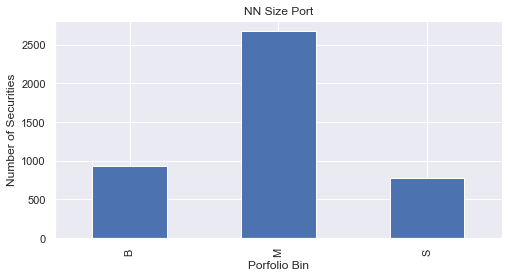

In [465]:
fig,ax = plt.subplots(figsize = (8, 4))
stock3['NNport'].value_counts(sort=False).plot(kind='bar')
ax.set_ylabel('Number of Securities')
ax.set_xlabel('Porfolio Bin')
ax.set_title('NN Size Port')

In [466]:
nn_ewret = stock3.groupby(['DATE','NNport'])['monthly_ret'].mean().to_frame().reset_index().rename(columns={'monthly_ret':'ewret'}).copy()
nn_ew_bin_port = nn_ewret.pivot(index='DATE', columns='NNport', values='ewret')
nn_ew_bin_port

NNport,B,M,S
DATE,,,
1996-01-31,0.003022,NaN,0.044315
1996-02-29,-0.014559,NaN,0.055249
1996-03-29,-0.057999,-0.051335,NaN
1996-04-30,0.155966,0.058577,NaN
1996-05-31,0.268784,0.072986,NaN
...,...,...,...
2016-08-31,0.021338,-0.002417,0.015212
2016-09-30,0.040985,-0.000189,0.032270
2016-10-31,0.022413,-0.076291,-0.016069


In [473]:
nn_ew_bin_port = nn_ew_bin_port.ffill()
nn_ew_bin_port = nn_ew_bin_port.fillna(0)
nn_ew_bin_port

NNport,B,M,S
DATE,,,
1996-01-31,0.003022,0.000000,0.044315
1996-02-29,-0.014559,0.000000,0.055249
1996-03-29,-0.057999,-0.051335,0.055249
1996-04-30,0.155966,0.058577,0.055249
1996-05-31,0.268784,0.072986,0.055249
...,...,...,...
2016-08-31,0.021338,-0.002417,0.015212
2016-09-30,0.040985,-0.000189,0.032270
2016-10-31,0.022413,-0.076291,-0.016069


In [467]:
ret50[['permno','DATE','mvel1']]
stock4 = pd.merge(stock3, ret50[['permno','DATE','mvel1']].copy(), on=['DATE','permno'], how='left').copy()
me_sum = stock4.groupby(['DATE','NNport'])['mvel1'].sum().to_frame().reset_index().rename(columns={'mvel1':'ttlmvel1'})
stock4 = stock4.merge(me_sum, on=['DATE', 'NNport'], how='left')
stock4['w'] = stock4['mvel1']/stock4['ttlmvel1']
stock4['vwret'] = stock4['w']*stock4['monthly_ret']
nnvwret=stock4.groupby(['DATE','NNport'])['monthly_ret'].sum().to_frame().reset_index().rename(columns={'monthly_ret': 'vwret'}).copy()
nn_vw_bin_port = nnvwret.pivot(index='DATE', columns='NNport', values='vwret')
nn_vw_bin_port

NNport,B,M,S
DATE,,,
1996-01-31,0.024174,NaN,0.354519
1996-02-29,-0.116472,NaN,0.441996
1996-03-29,-0.347993,-0.513349,NaN
1996-04-30,0.935796,0.585773,NaN
1996-05-31,1.881489,0.656873,NaN
...,...,...,...
2016-08-31,0.234715,-0.002417,0.167329
2016-09-30,0.450836,-0.000189,0.354967
2016-10-31,0.246547,-0.076291,-0.176763


In [474]:
nn_vw_bin_port = nn_vw_bin_port.ffill()
nn_vw_bin_port = nn_vw_bin_port.fillna(0)

nn_vw_bin_port

NNport,B,M,S
DATE,,,
1996-01-31,0.024174,0.000000,0.354519
1996-02-29,-0.116472,0.000000,0.441996
1996-03-29,-0.347993,-0.513349,0.441996
1996-04-30,0.935796,0.585773,0.441996
1996-05-31,1.881489,0.656873,0.441996
...,...,...,...
2016-08-31,0.234715,-0.002417,0.167329
2016-09-30,0.450836,-0.000189,0.354967
2016-10-31,0.246547,-0.076291,-0.176763


In [ ]:
qam_data_folder =  '/Users/jeffreychen/UCLA_HWDATA/QAM_DATA/'

FF_french = pd.read_pickle(qam_data_folder + 'french.pkl')
FF_french = FF_french[['date','RF']]
FF_french.rename(columns={'date':'DATE'}, inplace=True)
FF_french

In [484]:
nn_vw_stock = pd.merge(nn_vw_bin_port, FF_french, on=['DATE'], how='left').copy()
nn_vw_stock['RF'] = nn_vw_stock['RF'].ffill()

vw_nn_port_rex = pd.DataFrame()
bz_cols = ['B', 'M', 'S']
for col in bz_cols:
    vw_nn_port_rex[col+'_EX'] = nn_vw_stock[col] - nn_vw_stock['RF']
vw_nn_port_rex['SMB'] = nn_vw_stock['S'] - nn_vw_stock['B']
vw_nn_port_rex

,B_EX,M_EX,S_EX,SMB
0,0.019874,-0.004300,0.350219,0.330345
1,-0.120372,-0.003900,0.438096,0.558468
2,-0.351893,-0.517249,0.438096,0.789989
3,0.931196,0.581173,0.437396,-0.493800
4,1.877289,0.652673,0.437796,-1.439493
...,...,...,...,...
247,0.234515,-0.002617,0.167129,-0.067386
248,0.450636,-0.000389,0.354767,-0.095869
249,0.246347,-0.076491,-0.176963,-0.423310
250,0.051779,0.002481,0.171119,0.119340


In [486]:
vw_nn_report = pd.DataFrame()
vw_nn_report['Excess Returns'] = vw_nn_port_rex.mean()*12*100
vw_nn_report['Volatility'] = vw_nn_port_rex.std()*np.sqrt(12)*100
vw_nn_report['Sharpe Ratio'] = vw_nn_report['Excess Returns']/vw_nn_report['Volatility'] 
vw_nn_report['skewness']= vw_nn_port_rex.skew()
vw_nn_report 

,Excess Returns,Volatility,Sharpe Ratio,skewness
B_EX,206.281971,176.429214,1.169205,0.951166
M_EX,226.511014,356.716915,0.634988,-0.225330
S_EX,278.266043,177.107808,1.571168,1.441933
SMB,71.984071,238.294394,0.302080,1.343529


In [499]:
stock3

,permno,DATE,monthly_ret,NNport
0,65752,1996-01-31,-0.031250,B
1,10107,1996-01-31,0.054131,S
2,77178,1996-01-31,0.040698,S
3,80366,1996-01-31,-0.468750,B
4,76076,1996-01-31,0.115578,S
...,...,...,...,...
4380,14593,2016-12-30,0.047955,S
4381,12490,2016-12-30,0.023240,S
4382,59328,2016-12-30,0.045245,S
4383,86580,2016-12-30,0.157701,B


In [495]:
import seaborn as sns

performance_plot = nn_vw_bin_port.reset_index().copy()
performance_plot['smb'] = performance_plot['S'] - performance_plot['B']
performance_plot['s'] = performance_plot['S'] + 1
performance_plot['m'] = performance_plot['M'] + 1
performance_plot['b'] = performance_plot['B'] + 1
performance_plot['smb_aux'] = performance_plot['smb'] + 1
performance_plot['S'] = performance_plot['s'].cumprod() 
performance_plot['M'] = performance_plot['m'].cumprod() 
performance_plot['B'] = performance_plot['b'].cumprod() 
performance_plot['SMB'] = performance_plot['smb_aux'].cumprod() 
performance_plot = performance_plot[['DATE','S', 'B','SMB']].reset_index(drop=True)
performance_plot


NNport,DATE,S,B,SMB
0,1996-01-31,1.354519e+00,1.024174e+00,1.330345e+00
1,1996-02-29,1.953211e+00,9.048864e-01,2.073300e+00
2,1996-03-29,2.816522e+00,5.899923e-01,3.711184e+00
3,1996-04-30,4.061414e+00,1.142105e+00,1.878602e+00
4,1996-05-31,5.856543e+00,3.290962e+00,-8.256322e-01
...,...,...,...,...
247,2016-08-31,4.114184e+12,-1.669817e+09,2.220122e-09
248,2016-09-30,5.574584e+12,-2.422630e+09,2.007281e-09
249,2016-10-31,4.589203e+12,-3.019923e+09,1.157579e-09
250,2016-11-30,5.374962e+12,-3.176593e+09,1.295724e-09


Text(0.5, 1.0, 'NN2 Value Weighted performance')

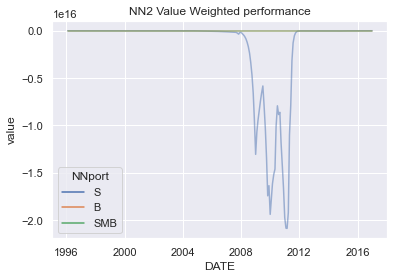

In [497]:
sns.set_theme()
ax = sns.lineplot(x='DATE', y='value', hue='NNport', alpha=0.5,  
             data=pd.melt(performance_plot, ['DATE']))
ax.set_title('NN2 Value Weighted performance')

In [500]:
stock3

,permno,DATE,monthly_ret,NNport
0,65752,1996-01-31,-0.031250,B
1,10107,1996-01-31,0.054131,S
2,77178,1996-01-31,0.040698,S
3,80366,1996-01-31,-0.468750,B
4,76076,1996-01-31,0.115578,S
...,...,...,...,...
4380,14593,2016-12-30,0.047955,S
4381,12490,2016-12-30,0.023240,S
4382,59328,2016-12-30,0.045245,S
4383,86580,2016-12-30,0.157701,B


In [513]:
performance_plot = stock3.copy()
performance_plot['ret1w_aux'] = performance_plot['monthly_ret'] + 1
performance_plot['acc_ret'] = performance_plot.groupby(['NNport'])['ret1w_aux'].cumprod()#.reset_index()
performance_plot = performance_plot[['DATE','NNport','acc_ret']]
performance_plot
#performance_plot = performance_plot.pivot(index ='DATE',columns = 'NNport',values = 'acc_ret')
# performance_plot.iloc[:,[0,1,2]] = performance_plot.iloc[:,[0,1,2]] / performance_plot.iloc[0,[0,1,2]]
# performance_plot = performance_plot.rename(columns={1:"Momentum Short Leg",
#                                                     K:"Momentum Long Leg",
#                                                     K+1:"MTUM (ETF)"})
# performance_plot.plot(colormap='Paired',figsize=(10,6))

,DATE,NNport,acc_ret
0,1996-01-31,B,9.687500e-01
1,1996-01-31,S,1.054131e+00
2,1996-01-31,S,1.097032e+00
3,1996-01-31,B,5.146484e-01
4,1996-01-31,S,1.223825e+00
...,...,...,...
4380,2016-12-30,S,1.327950e+06
4381,2016-12-30,S,1.358812e+06
4382,2016-12-30,S,1.420291e+06
4383,2016-12-30,B,5.861605e+05


<h2> Equal Wei

In [512]:
nn_ewret = stock3.groupby(['DATE','NNport'])['monthly_ret'].mean().to_frame().reset_index().rename(columns={'monthly_ret':'ewret'}).copy()
nn_ew_bin_port = nn_ewret.pivot(index='DATE', columns='NNport', values='ewret')
nn_ew_bin_port

NNport,B,M,S
DATE,,,
1996-01-31,0.003022,0.000000,0.044315
1996-02-29,-0.014559,0.000000,0.055249
1996-03-29,-0.057999,-0.051335,0.055249
1996-04-30,0.155966,0.058577,0.055249
1996-05-31,0.268784,0.072986,0.055249
...,...,...,...
2016-08-31,0.021338,-0.002417,0.015212
2016-09-30,0.040985,-0.000189,0.032270
2016-10-31,0.022413,-0.076291,-0.016069


<h2> Value Wei

In [281]:
ret50[['permno','DATE','mvel1']]

,permno,DATE,mvel1
0,12490,1971-01-29,3.403772e+06
1,46711,1971-01-29,5.715000e+03
2,12490,1971-02-26,3.578008e+06
3,46711,1971-02-26,8.001000e+03
4,12490,1971-03-31,3.664222e+06
...,...,...,...
7277,90319,2016-12-30,1.071768e+08
7278,91893,2016-12-30,3.000031e+04
7279,92257,2016-12-30,9.052465e+06
7280,93132,2016-12-30,5.208474e+06


In [287]:
stock4 = pd.merge(stock3, ret50[['permno','DATE','mvel1']].copy(), on=['DATE','permno'], how='left').copy()
me_sum = stock4.groupby(['DATE','NNport'])['mvel1'].sum().to_frame().reset_index().rename(columns={'mvel1':'ttlmvel1'})
stock4 = stock4.merge(me_sum, on=['DATE', 'NNport'], how='left')
stock4['w'] = stock4['mvel1']/stock4['ttlmvel1']
stock4['vwret'] = stock4['w']*stock4['monthly_ret']
stock4

,permno,DATE,monthly_ret,NNport,mvel1,ttlmvel1,w,vwret
0,65752,1996-01-31,-0.031250,NN04,1.032000e+04,6.875338e+04,0.150102,-0.004691
1,10107,1996-01-31,0.054131,NN10,1.509363e+07,3.018725e+07,0.500000,0.027065
2,77178,1996-01-31,0.040698,NN01,2.975084e+06,5.147294e+06,0.577990,0.023523
3,80366,1996-01-31,-0.468750,NN02,2.350000e+04,3.947886e+06,0.005953,-0.002790
4,76076,1996-01-31,0.115578,NN06,1.509363e+07,2.028311e+07,0.744148,0.086007
...,...,...,...,...,...,...,...,...
4380,14593,2016-12-30,0.047955,NN06,1.071768e+08,2.143537e+08,0.500000,0.023978
4381,12490,2016-12-30,0.023240,NN02,1.071768e+08,1.072068e+08,0.999720,0.023233
4382,59328,2016-12-30,0.045245,NN06,1.071768e+08,2.143537e+08,0.500000,0.022623
4383,86580,2016-12-30,0.157701,NN03,4.969580e+07,5.039336e+07,0.986158,0.155518


In [288]:
nnvwret=stock4.groupby(['DATE','NNport'])['monthly_ret'].sum().to_frame().reset_index().rename(columns={'monthly_ret': 'vwret'}).copy()
nn_vw_bin_port = nnvwret.pivot(index='DATE', columns='NNport', values='vwret')
nn_vw_bin_port

NNport,NN01,NN02,NN03,NN04,NN05,NN06,NN07,NN08,NN09,NN10
DATE,,,,,,,,,,
1996-01-31,0.307091,-0.602083,0.196970,-0.096185,0.187414,0.104767,-0.026002,0.103524,0.022222,0.180975
1996-02-29,-0.123240,-0.117647,-0.018987,0.210585,0.132488,0.070929,0.064781,-0.072464,0.023182,0.155897
1996-03-29,-0.054520,-0.294623,-0.177994,-0.129200,-0.023684,-0.072196,-0.109589,0.011749,-0.093750,0.082465
1996-04-30,0.069289,0.095152,0.153846,0.040481,0.026667,0.093409,0.191912,0.651622,0.026738,0.172453
1996-05-31,0.476634,0.333333,-0.057627,0.128127,0.055422,0.034071,0.114391,1.415736,-0.018519,0.056794
...,...,...,...,...,...,...,...,...,...,...
2016-08-31,0.055794,-0.165264,0.001969,0.106077,0.110171,0.021723,-0.029078,0.054594,0.061912,0.181729
2016-09-30,-0.075081,0.058410,-0.038159,0.189957,0.165507,0.063113,0.067902,0.106594,0.198877,0.068494
2016-10-31,0.027910,0.051852,-0.042665,0.050243,-0.056237,-0.023615,-0.059523,0.307351,-0.035512,-0.226311


<h2> Summary

In [284]:
qam_data_folder =  '/Users/jeffreychen/UCLA_HWDATA/QAM_DATA/'

FF_french = pd.read_pickle(qam_data_folder + 'french.pkl')
FF_french = FF_french[['date','RF']]
FF_french.rename(columns={'date':'DATE'}, inplace=True)
FF_french

,DATE,RF
0,1926-07-31,0.0022
1,1926-08-31,0.0025
2,1926-09-30,0.0023
3,1926-10-31,0.0032
4,1926-11-30,0.0031
...,...,...
1133,2020-12-31,0.0001
1134,2021-01-31,0.0000
1135,2021-02-28,0.0000
1136,2021-03-31,0.0000


<h2>Value Wei Repoty

In [290]:
nn_vw_stock = pd.merge(nn_vw_bin_port, FF_french, on=['DATE'], how='left').copy()
nn_vw_stock['RF'] = nn_vw_stock['RF'].bfill()
vw_nn_port_rex = pd.DataFrame()
for i in range(1, 11):
    if i == 10:
        vw_nn_port_rex['NN'+str(i)+'_EX'] = nn_vw_stock['NN'+str(i)] - nn_vw_stock['RF']
    else:
        vw_nn_port_rex['NN0'+str(i)+'_EX'] = nn_vw_stock['NN0'+str(i)] - nn_vw_stock['RF']
vw_nn_port_rex['H-L'] = nn_vw_stock['NN10'] - nn_vw_stock['NN01']
vw_nn_port_rex

,NN01_EX,NN02_EX,NN03_EX,NN04_EX,NN05_EX,NN06_EX,NN07_EX,NN08_EX,NN09_EX,NN10_EX,H-L
0,0.302791,-0.606383,0.192670,-0.100485,0.183114,0.100467,-0.030302,0.099224,0.017922,0.176675,-0.126116
1,-0.127140,-0.121547,-0.022887,0.206685,0.128588,0.067029,0.060881,-0.076364,0.019282,0.151997,0.279137
2,-0.059120,-0.299223,-0.182594,-0.133800,-0.028284,-0.076796,-0.114189,0.007149,-0.098350,0.077865,0.136985
3,0.064689,0.090552,0.149246,0.035881,0.022067,0.088809,0.187312,0.647022,0.022138,0.167853,0.103164
4,0.472434,0.329133,-0.061827,0.123927,0.051222,0.029871,0.110191,1.411536,-0.022719,0.052594,-0.419840
...,...,...,...,...,...,...,...,...,...,...,...
247,0.055594,-0.165464,0.001769,0.105877,0.109971,0.021523,-0.029278,0.054394,0.061712,0.181529,0.125935
248,-0.075281,0.058210,-0.038359,0.189757,0.165307,0.062913,0.067702,0.106394,0.198677,0.068294,0.143575
249,0.027710,0.051652,-0.042865,0.050043,-0.056437,-0.023815,-0.059723,0.307151,-0.035712,-0.226511,-0.254221
250,0.389505,-0.151058,0.004185,0.366400,-0.012032,-0.047214,-0.029922,-0.082813,-0.105254,-0.107118,-0.496623


In [403]:
vw_nn_report = pd.DataFrame()
vw_nn_report['Excess Returns'] = vw_nn_port_rex.mean()*12*100
vw_nn_report['Volatility'] = vw_nn_port_rex.std()*np.sqrt(12)*100
vw_nn_report['Sharpe Ratio'] = vw_nn_report['Excess Returns']/vw_nn_report['Volatility'] 
vw_nn_report['skewness']= vw_nn_port_rex.skew()
vw_nn_report = vw_nn_report.T
vw_nn_report.T

,Excess Returns,Volatility,Sharpe Ratio,skewness
NN01_EX,48.275087,114.378317,0.422065,1.727203
NN02_EX,9.817759,77.553635,0.126593,-0.221945
NN03_EX,50.487653,81.171214,0.621990,0.718278
NN04_EX,50.210706,70.619005,0.711008,0.777939
NN05_EX,56.000500,81.173177,0.689889,1.441104
NN06_EX,28.029390,54.824405,0.511258,-0.167663
NN07_EX,26.141780,53.960703,0.484460,0.915860
NN08_EX,52.810580,71.290619,0.740779,1.317485
NN09_EX,23.135139,56.437999,0.409921,1.047203
NN10_EX,44.368590,70.010210,0.633745,-0.026924


<h2> Equal Wei Report

In [292]:
nn_ew_stock = pd.merge(nn_ew_bin_port, FF_french, on=['DATE'], how='left')
ew_nn_port_rex = pd.DataFrame()
for i in range(1, 11):
    if i == 10:
        ew_nn_port_rex['NN'+str(i)+'_EX'] = nn_ew_stock['NN'+str(i)] - nn_ew_stock['RF']
    else:
        ew_nn_port_rex['NN0'+str(i)+'_EX'] = nn_ew_stock['NN0'+str(i)] - nn_ew_stock['RF']
ew_nn_port_rex['H-S'] = nn_ew_stock['NN10'] - nn_ew_stock['NN01']
ew_nn_port_rex

,NN01_EX,NN02_EX,NN03_EX,NN04_EX,NN05_EX,NN06_EX,NN07_EX,NN08_EX,NN09_EX,NN10_EX,H-S
0,0.149246,-0.305341,0.192670,-0.052393,0.183114,0.048084,-0.030302,0.047462,0.017922,0.086188,-0.063058
1,-0.065520,-0.062724,-0.022887,0.101393,0.128588,0.031564,0.060881,-0.040132,0.019282,0.074049,0.139569
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.068492
3,0.030045,0.042976,0.149246,0.015640,0.022067,0.042104,0.187312,0.321211,0.022138,0.081627,0.051582
4,0.234117,0.162466,-0.061827,0.059864,0.051222,0.012835,0.110191,0.703668,-0.022719,0.024197,-0.209920
...,...,...,...,...,...,...,...,...,...,...,...
247,0.018398,-0.082832,0.000784,0.052839,0.036524,0.010661,-0.014739,0.027097,0.030756,0.060376,0.041978
248,-0.025227,0.029005,-0.019279,0.094778,0.054969,0.031357,0.033751,0.053097,0.099238,0.022631,0.047858
249,0.009103,0.025726,-0.021532,0.024922,-0.018946,-0.012007,-0.029962,0.153475,-0.017956,-0.075637,-0.084740
250,0.129768,-0.075579,0.002043,0.183150,-0.004077,-0.023657,-0.015011,-0.041457,-0.052677,-0.035773,-0.165541


In [294]:
ew_nn_report = pd.DataFrame()
ew_nn_report['Excess Returns'] = ew_nn_port_rex.mean()*12*100
ew_nn_report['Volatility'] = ew_nn_port_rex.std()*np.sqrt(12)*100
ew_nn_report['Sharpe Ratio'] = ew_nn_report['Excess Returns']/ew_nn_report['Volatility'] 
ew_nn_report['skewness']= ew_nn_port_rex.skew()
ew_nn_report =ew_nn_report.T
ew_nn_report

,NN01_EX,NN02_EX,NN03_EX,NN04_EX,NN05_EX,NN06_EX,NN07_EX,NN08_EX,NN09_EX,NN10_EX,H-S
Excess Returns,29.705047,15.271558,30.144065,30.275066,26.859373,15.768620,23.122176,32.429120,23.111891,27.121976,-0.490411
Volatility,58.990772,47.909466,63.240065,43.056563,48.397174,36.776934,46.437577,40.976588,37.219982,33.472216,51.821047
Sharpe Ratio,0.503554,0.318759,0.476661,0.703146,0.554978,0.428764,0.497920,0.791406,0.620954,0.810283,-0.009464
skewness,2.042565,0.356124,1.608138,0.898849,2.338473,-0.599881,1.052665,1.092262,1.084842,0.358640,-1.613721


<h2> Ploting VW

In [301]:
nn_vw_bin_port.reset_index()

NNport,DATE,NN01,NN02,NN03,NN04,NN05,NN06,NN07,NN08,NN09,NN10
0,1996-01-31,0.307091,-0.602083,0.196970,-0.096185,0.187414,0.104767,-0.026002,0.103524,0.022222,0.180975
1,1996-02-29,-0.123240,-0.117647,-0.018987,0.210585,0.132488,0.070929,0.064781,-0.072464,0.023182,0.155897
2,1996-03-29,-0.054520,-0.294623,-0.177994,-0.129200,-0.023684,-0.072196,-0.109589,0.011749,-0.093750,0.082465
3,1996-04-30,0.069289,0.095152,0.153846,0.040481,0.026667,0.093409,0.191912,0.651622,0.026738,0.172453
4,1996-05-31,0.476634,0.333333,-0.057627,0.128127,0.055422,0.034071,0.114391,1.415736,-0.018519,0.056794
...,...,...,...,...,...,...,...,...,...,...,...
247,2016-08-31,0.055794,-0.165264,0.001969,0.106077,0.110171,0.021723,-0.029078,0.054594,0.061912,0.181729
248,2016-09-30,-0.075081,0.058410,-0.038159,0.189957,0.165507,0.063113,0.067902,0.106594,0.198877,0.068494
249,2016-10-31,0.027910,0.051852,-0.042665,0.050243,-0.056237,-0.023615,-0.059523,0.307351,-0.035512,-0.226311
250,2016-11-30,0.389605,-0.150958,0.004285,0.366500,-0.011932,-0.047114,-0.029822,-0.082713,-0.105154,-0.107018


In [316]:
import seaborn as sns

performance_plot = nn_vw_bin_port.reset_index().copy()
performance_plot['h-l'] = performance_plot['NN10'] - performance_plot['NN01']
performance_plot['ret1_aux'] = performance_plot['NN01'] + 1
performance_plot['ret10_aux'] = performance_plot['NN10'] + 1
performance_plot['hml_aux'] = performance_plot['h-l'] + 1
performance_plot['NN 10'] = performance_plot['ret10_aux'].cumprod() 
performance_plot['NN 1'] = performance_plot['ret1_aux'].cumprod() 
performance_plot['H-L'] = performance_plot['hml_aux'].cumprod() 
performance_plot = performance_plot[['DATE','NN 10', 'NN 1', 'H-L']].reset_index(drop=True)
performance_plot

NNport,DATE,NN 10,NN 1,H-L
0,1996-01-31,1.180975,1.307091,0.873884
1,1996-02-29,1.365085,1.146005,1.117817
2,1996-03-29,1.477657,1.083525,1.270942
3,1996-04-30,1.732484,1.158601,1.402057
4,1996-05-31,1.830878,1.710830,0.813417
...,...,...,...,...
247,2016-08-31,109.635398,0.127874,0.000086
248,2016-09-30,117.144765,0.118273,0.000099
249,2016-10-31,90.633616,0.121574,0.000074
250,2016-11-30,80.934188,0.168940,0.000037


Text(0.5, 1.0, 'NN2 Value Weighted performance')

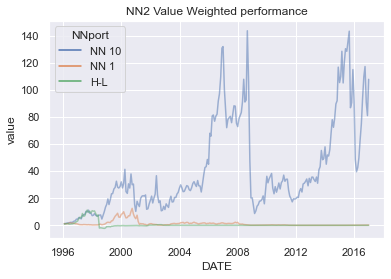

In [317]:
sns.set_theme()
ax = sns.lineplot(x='DATE', y='value', hue='NNport', alpha=0.5,  
             data=pd.melt(performance_plot, ['DATE']))
ax.set_title('NN2 Value Weighted performance')

<h2> Plotting EW

In [313]:
nn_ew_bin_port

NNport,NN01,NN02,NN03,NN04,NN05,NN06,NN07,NN08,NN09,NN10
DATE,,,,,,,,,,
1996-01-31,0.153546,-0.301041,0.196970,-0.048093,0.187414,0.052383,-0.026002,0.051762,0.022222,0.090487
1996-02-29,-0.061620,-0.058824,-0.018987,0.105293,0.132488,0.035464,0.064781,-0.036232,0.023182,0.077949
1996-03-29,-0.027260,-0.147311,-0.177994,-0.064600,-0.023684,-0.036098,-0.109589,0.005875,-0.093750,0.041232
1996-04-30,0.034645,0.047576,0.153846,0.020240,0.026667,0.046704,0.191912,0.325811,0.026738,0.086227
1996-05-31,0.238317,0.166666,-0.057627,0.064064,0.055422,0.017035,0.114391,0.707868,-0.018519,0.028397
...,...,...,...,...,...,...,...,...,...,...
2016-08-31,0.018598,-0.082632,0.000984,0.053039,0.036724,0.010861,-0.014539,0.027297,0.030956,0.060576
2016-09-30,-0.025027,0.029205,-0.019079,0.094978,0.055169,0.031557,0.033951,0.053297,0.099438,0.022831
2016-10-31,0.009303,0.025926,-0.021333,0.025122,-0.018746,-0.011807,-0.029762,0.153675,-0.017756,-0.075437


In [314]:
performance_plot = nn_ew_bin_port.reset_index().copy()
performance_plot['H-L'] = performance_plot['NN10'] - performance_plot['NN01']
performance_plot['ret1_aux'] = performance_plot['NN01'] + 1
performance_plot['ret10_aux'] = performance_plot['NN10'] + 1
performance_plot['hml_aux'] = performance_plot['H-L'] + 1
performance_plot['NN 10'] = performance_plot['ret10_aux'].cumprod() 
performance_plot['NN 1'] = performance_plot['ret1_aux'].cumprod() 
performance_plot['H-L'] = performance_plot['hml_aux'].cumprod() 
performance_plot = performance_plot[['DATE','NN 10', 'NN 1', 'H-L']].reset_index(drop=True)
performance_plot

NNport,DATE,NN 10,NN 1,H-L
0,1996-01-31,1.090488,1.153545,0.936942
1,1996-02-29,1.175489,1.082464,1.067710
2,1996-03-29,1.223958,1.052956,1.140840
3,1996-04-30,1.329495,1.089435,1.199686
4,1996-05-31,1.367249,1.349066,0.947848
...,...,...,...,...
247,2016-08-31,40.516933,6.358288,-0.005610
248,2016-09-30,41.441988,6.199159,-0.005878
249,2016-10-31,38.315729,6.256832,-0.005380
250,2016-11-30,36.948905,7.069396,-0.004490


Text(0.5, 1.0, 'NN2 Equal Weighted performance')

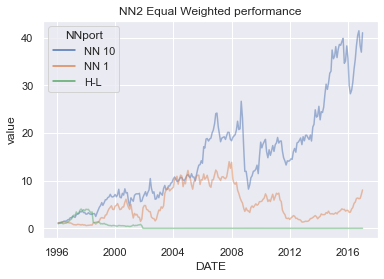

In [315]:
sns.set_theme()
ax = sns.lineplot(x='DATE', y='value', hue='NNport', alpha=0.5,  
             data=pd.melt(performance_plot, ['DATE']))
ax.set_title('NN2 Equal Weighted performance')